<a href="https://colab.research.google.com/github/shanmukhmunaga/road-lane-detection/blob/main/ml_idp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
image_folder = "/content/drive/My Drive/test_images"


In [ ]:
import os

image_folder = "/content/drive/My Drive/test_images"
print("Files in dataset:", os.listdir(image_folder))


Files in dataset: ['example105.png', 'example103.png', 'example114.png', 'example100.png', 'example113.png', 'example112.png', 'example0.jpg', 'example102.png', 'example110.png', 'example111.png', 'example11.png', 'example109.png', 'example101.png', 'example108.png', 'example104.png', 'example115.png', 'example1.jpg', 'example106.png', 'example10.png', 'example107.png', 'example116.png', 'example140.png', 'example133.png', 'example134.png', 'example118.png', 'example124.png', 'example131.png', 'example121.png', 'example139.png', 'example129.png', 'example135.png', 'example138.png', 'example137.png', 'example125.png', 'example14.png', 'example127.png', 'example117.png', 'example130.png', 'example13.png', 'example122.png', 'example12.png', 'example120.png', 'example123.png', 'example119.png', 'example136.png', 'example126.png', 'example128.png', 'example132.png', 'example16.png', 'example156.png', 'example164.png', 'example158.png', 'example144.png', 'example153.png', 'example146.png', '

In [ ]:
!pip install --quiet catboost

   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.4/98.7 MB 45.5 MB/s eta 0:00:02
ERROR: Operation cancelled by user


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50, Xception, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

# 🔹 Load & Preprocess Images
def load_and_preprocess_images(image_folder):
    images = []
    filenames = []

    for filename in os.listdir(image_folder):
        img_path = os.path.join(image_folder, filename)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0  # Normalize
        images.append(img_array)
        filenames.append(filename)

    images = np.array(images)

        # Ensure correct shape for CNNs
    if images.shape[-1] == 1:
        images = np.repeat(images, 3, axis=-1)  # Convert grayscale to RGB

    return images, filenames



In [ ]:
#  Extract Features using CNNs
def extract_features_cnn(model, images):
    return model.predict(images, verbose=0)

In [ ]:
image_folder = "/content/drive/My Drive/test_images"  # Change this!
images, filenames = load_and_preprocess_images(image_folder)


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

#  Load CNN Models (Feature Extraction)
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_xception = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model_resnet = Model(inputs=base_resnet.input, outputs=Model(base_resnet.output, GlobalAveragePooling2D()(base_resnet.output)).output)
model_xception = Model(inputs=base_xception.input, outputs=Model(base_xception.output, GlobalAveragePooling2D()(base_xception.output)).output)
model_mobilenet = Model(inputs=base_mobilenet.input, outputs=Model(base_mobilenet.output, GlobalAveragePooling2D()(base_mobilenet.output)).output)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Image shape before feature extraction:", images.shape)

# Ensure correct shape (batch_size, 224, 224, 3)
if len(images.shape) == 3:
    images = np.expand_dims(images, axis=0)  # Add batch dimension
elif images.shape[-1] == 1:
    images = np.repeat(images, 3, axis=-1)  # Convert grayscale to RGB

print("Updated image shape:", images.shape)


Image shape before feature extraction: (296, 224, 224, 3)
Updated image shape: (296, 224, 224, 3)


In [ ]:
def extract_features_cnn(model, images):
    """Extract features from CNN model while ensuring correct shape."""
    images = np.array(images, dtype=np.float32)  # Ensure float32 format
    return model.predict(images, verbose=0)


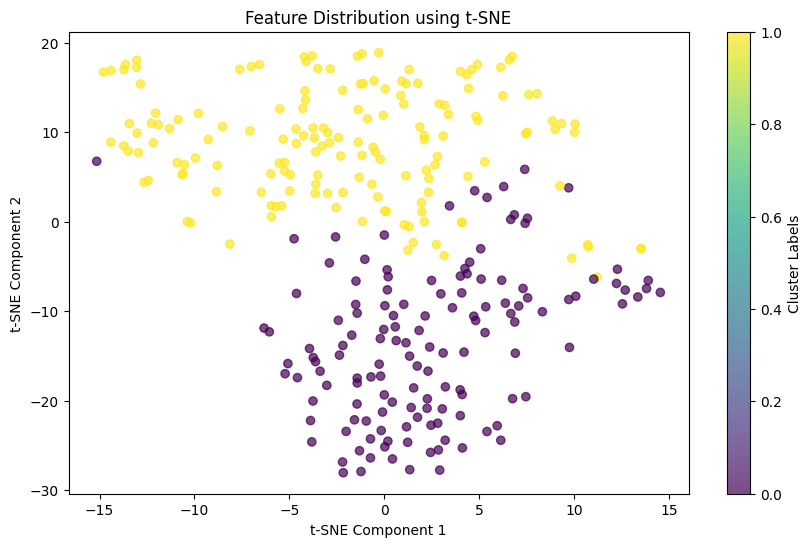

In [ ]:
from sklearn.manifold import TSNE

# Reduce dimensionality to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(combined_features)

# Plot features
plt.figure(figsize=(10, 6))
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(label="Cluster Labels")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Feature Distribution using t-SNE")
plt.show()


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

# Define feature extraction models
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_xception = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model_resnet = Model(inputs=base_resnet.input, outputs=GlobalAveragePooling2D()(base_resnet.output))
model_xception = Model(inputs=base_xception.input, outputs=GlobalAveragePooling2D()(base_xception.output))
model_mobilenet = Model(inputs=base_mobilenet.input, outputs=GlobalAveragePooling2D()(base_mobilenet.output))


In [ ]:
features_resnet = extract_features_cnn(model_resnet, images)
features_xception = extract_features_cnn(model_xception, images)
features_mobilenet = extract_features_cnn(model_mobilenet, images)

print("Feature extraction successful!")
print("ResNet Features Shape:", features_resnet.shape)
print("Xception Features Shape:", features_xception.shape)
print("MobileNet Features Shape:", features_mobilenet.shape)


Feature extraction successful!
ResNet Features Shape: (296, 2048)
Xception Features Shape: (296, 2048)
MobileNet Features Shape: (296, 1280)


In [ ]:
combined_features = np.hstack([features_resnet, features_xception, features_mobilenet])


In [ ]:
# 🔹 Unsupervised Clustering (K-Means)
num_clusters = 2  # Adjust based on dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(combined_features)
labels = kmeans.labels_


In [ ]:
silhouette_avg = silhouette_score(combined_features, labels)
print("Silhouette Score for Clustering:", silhouette_avg)


Silhouette Score for Clustering: 0.1251934


In [ ]:
from sklearn.manifold import TSNE

# Reduce high-dimensional features to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(combined_features)

print("t-SNE transformation successful! Shape:", features_2d.shape)


t-SNE transformation successful! Shape: (296, 2)


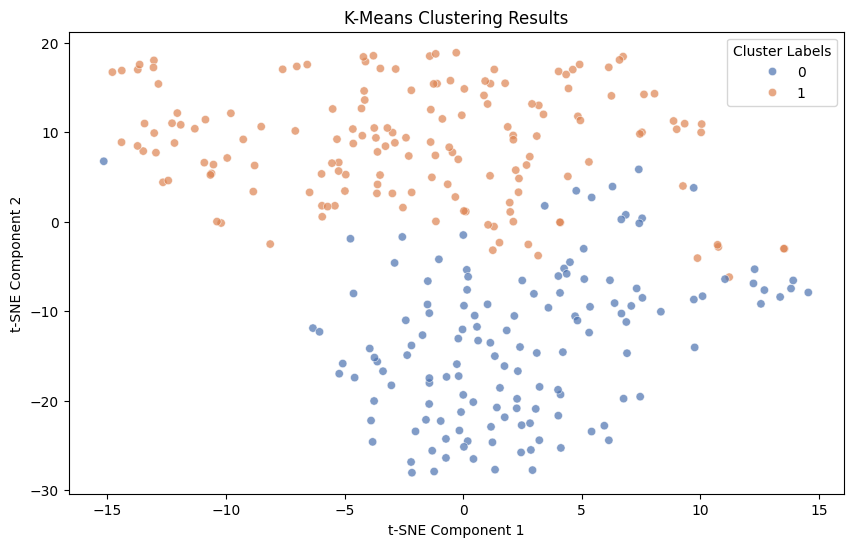

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# K-Means Clustering Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_2d[:, 0], y=features_2d[:, 1], hue=labels, palette="deep", alpha=0.7)
plt.title("K-Means Clustering Results")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster Labels")
plt.show()


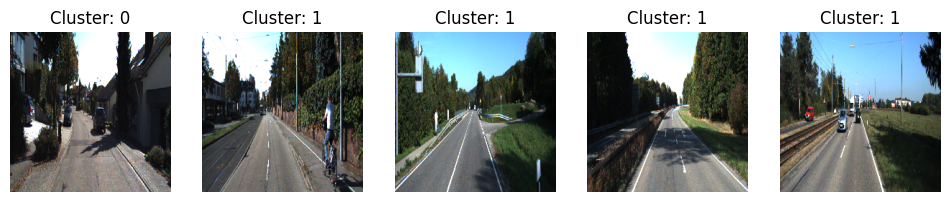

In [ ]:
#  Display Sample Images with Clusters
num_samples = 5
plt.figure(figsize=(12, 4))
for i in range(num_samples):
    idx = np.random.randint(0, len(images))
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[idx])
    plt.title(f"Cluster: {labels[idx]}")
    plt.axis("off")
plt.show()

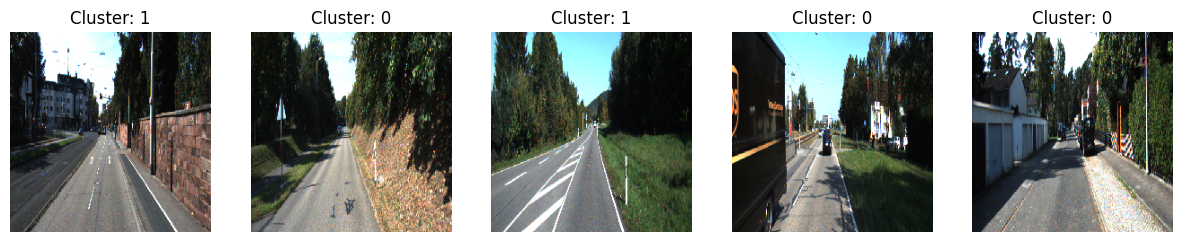

In [ ]:
import matplotlib.pyplot as plt
import random

# Ensure 'labels' is available
if 'labels' not in globals():
    print("Error: 'labels' is not defined. Run K-Means clustering first.")

# Define number of samples to display
num_samples = min(5, len(images))

# Randomly select sample indices
sample_indices = random.sample(range(len(images)), num_samples)

# Plot the selected images with their cluster labels
plt.figure(figsize=(15, 5))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[idx])  # Assuming images are in (224, 224, 3) format
    plt.title(f"Cluster: {labels[idx]}")  # Ensure 'labels' exists
    plt.axis("off")

plt.show()


In [ ]:
true_labels = labels  # If true labels are unknown, use K-Means labels


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(combined_features, true_labels, test_size=0.2, random_state=42)


In [ ]:
# Apply SMOTE (Handle Class Imbalance)
if len(np.unique(y_train)) > 1:  # Only apply if there are multiple classes
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
#  Train Machine Learning Models
from sklearn.ensemble import AdaBoostClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.05, random_state=42)


In [ ]:
# Train models
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
ada.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 129, number of negative: 129
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 291009
[LightGBM] [Info] Number of data points in the train set: 258, number of used features: 4127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

AdaBoostClassifier(learning_rate=0.05, n_estimators=100, random_state=42)

In [ ]:
# Predict on Test Data
y_pred_xgb = xgb.predict(X_test)
y_pred_lgbm = lgbm.predict(X_test)
y_pred_ada = ada.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Performance Metrics for XGBoost
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb, average="weighted")
rec_xgb = recall_score(y_test, y_pred_xgb, average="weighted")
f1_xgb = f1_score(y_test, y_pred_xgb, average="weighted")

# Performance Metrics for LightGBM
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
prec_lgbm = precision_score(y_test, y_pred_lgbm, average="weighted")
rec_lgbm = recall_score(y_test, y_pred_lgbm, average="weighted")
f1_lgbm = f1_score(y_test, y_pred_lgbm, average="weighted")

# Performance Metrics for AdaBoost
acc_ada = accuracy_score(y_test, y_pred_ada)
prec_ada = precision_score(y_test, y_pred_ada, average="weighted")
rec_ada = recall_score(y_test, y_pred_ada, average="weighted")
f1_ada = f1_score(y_test, y_pred_ada, average="weighted")




In [ ]:
# Display Results
print(f" XGBoost Accuracy: {acc_xgb:.4f}, Precision: {prec_xgb:.4f}, Recall: {rec_xgb:.4f}, F1-score: {f1_xgb:.4f}")
print(f" LightGBM Accuracy: {acc_lgbm:.4f}, Precision: {prec_lgbm:.4f}, Recall: {rec_lgbm:.4f}, F1-score: {f1_lgbm:.4f}")
print(f" AdaBoost Accuracy: {acc_ada:.4f}, Precision: {prec_ada:.4f}, Recall: {rec_ada:.4f}, F1-score: {f1_ada:.4f}")

 XGBoost Accuracy: 0.9167, Precision: 0.9170, Recall: 0.9167, F1-score: 0.9166
 LightGBM Accuracy: 0.9333, Precision: 0.9351, Recall: 0.9333, F1-score: 0.9332
 AdaBoost Accuracy: 0.9500, Precision: 0.9544, Recall: 0.9500, F1-score: 0.9498


In [ ]:
#  Ensemble Model (Voting Classifier)
ensemble_model = VotingClassifier(estimators=[('xgb', xgb), ('lgbm', lgbm), ('ada', ada)], voting='soft')
ensemble_model.fit(X_train, y_train)

y_pred_ensemble = ensemble_model.predict(X_test)
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Voting Ensemble Accuracy: {acc_ensemble:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 129, number of negative: 129
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 291009
[LightGBM] [Info] Number of data points in the train set: 258, number of used features: 4127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Figure size 600x500 with 0 Axes>

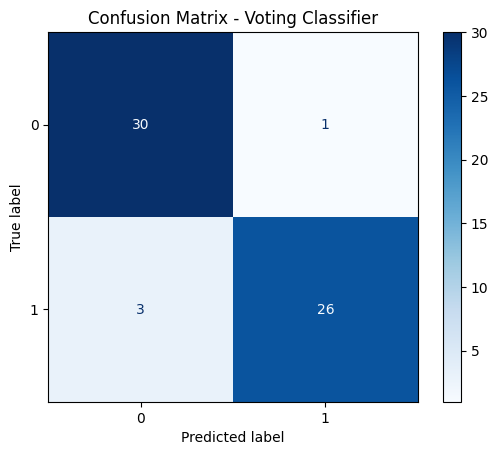

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)

# Display the confusion matrix
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Voting Classifier")
plt.show()


In [ ]:
#  Stacking Model
meta_model = LogisticRegression()
stacked_model = StackingClassifier(estimators=[('xgb', xgb), ('lgbm', lgbm), ('ada', ada)], final_estimator=meta_model)
stacked_model.fit(X_train, y_train)

y_pred_stacked = stacked_model.predict(X_test)
acc_stacked = accuracy_score(y_test, y_pred_stacked)
print(f"Stacked Model Accuracy: {acc_stacked:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 129, number of negative: 129
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 291009
[LightGBM] [Info] Number of data points in the train set: 258, number of used features: 4127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 103, number of negative: 103
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 234476
[LightGBM] [Info] Number of data points in the train set: 206, number of used features: 4117
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 103, number of negative: 103
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 233913
[LightGBM] [Info] Number of data points in the train set: 206, number of used features: 4119
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 103, number of negative: 103
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 234606
[LightGBM] [Info] Number of data points in the train set: 206, number of used features: 4115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 103, number of negative: 104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 235048
[LightGBM] [Info] Number of data points in the train set: 207, number of used features: 4114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497585 -> initscore=-0.009662
[LightGBM] [Info] Start training from score -0.009662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 104, number of negative: 103
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 232190
[LightGBM] [Info] Number of data points in the train set: 207, number of used features: 4109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502415 -> initscore=0.009662
[LightGBM] [Info] Start training from score 0.009662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Stacked Model Accuracy: 0.9333


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
